Output()

Output()

Output()

<IPython.core.display.Javascript object>


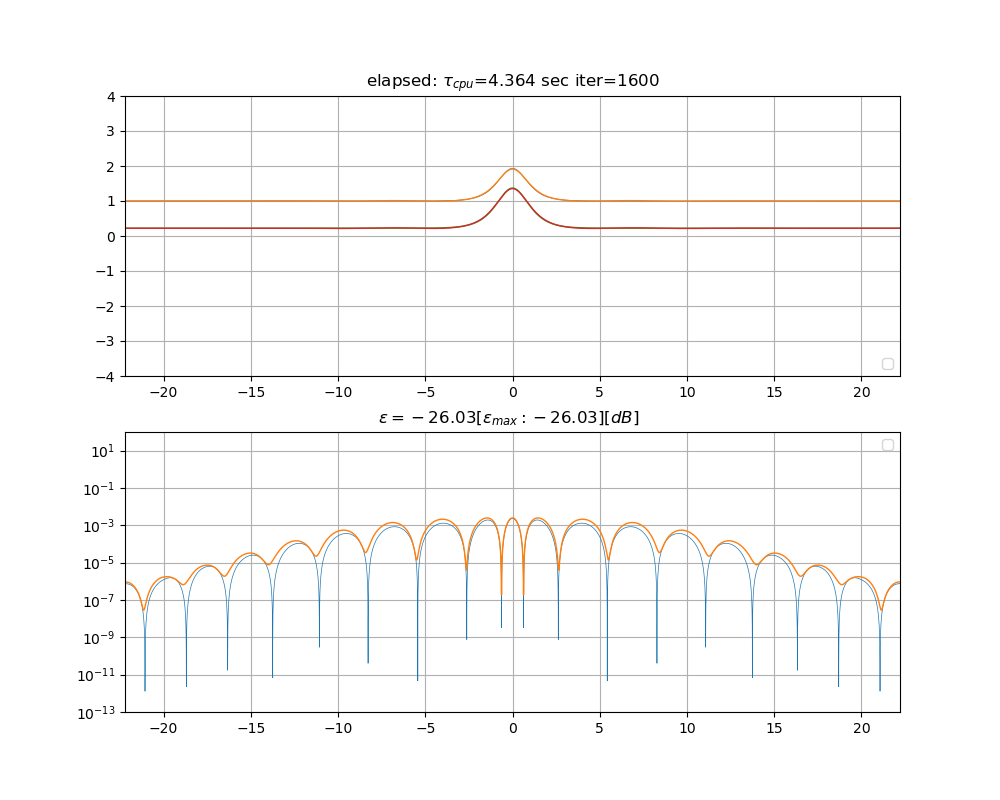

No handles with labels found to put in legend.


In [4]:
from utils import *
from NLS.brizers import *
from NLS.nls_adapter import *
import cmath
import numpy as np
from skimage.transform import resize
from skimage.transform import downscale_local_mean
from matplotlib import pyplot as plt

from matplotlib.animation import FuncAnimation

from plots.k3dsurf import surf,cmps
#from plots.animclosure import *


import k3d

%matplotlib notebook

A=1-1/8
A=1

N=16*1024
NZ=1000;
NZ=200;

mm=256+256;
mm=2;
mm=32
mm=8

omagnus=1
#mm=256;
#omagnus=0
flags=-1;

flags=0;
alpha=0*1e-8;

sname='nls-exp-dec';
sname='nls';
#sname='ssf';omagnus=0
[pT,pZ]=brizerKM_periods(A);
LT=5*abs(pT);
LZ=8/11*2*2.5*abs(pZ);
NvT=200;
NvZ=300;
tLv=np.linspace(-LT,LT,NvT);
zLv=np.linspace(-LZ*0,LZ,NvZ);
[TTv,ZZv]=np.meshgrid(tLv,zLv);
#figure
#tic


surf(lambda T,Z: np.abs(brizerKM(T,Z,A)),[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','|\\Psi(T,z)|'],cmp=cmps.twilight_shifted).display()

FFv=brizerKM(TTv,ZZv,A);
surf(FFv.real,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','\\Re\\Psi(T,z)']).display()
surf(FFv.imag,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','\\Im\\Psi(T,z)']).display()

tt=np.linspace(-LT,LT,N+1);
tt=tt[0:N]
g=1;
[nls,dzu,h]=nls_rescale_to(tt,sname,g);
hz=LZ/NZ; 
dz=hz* dzu/mm

nls.reset(dt=dz,nm=[4,4],omagnus=omagnus,alpha=alpha,w=1/3,flags=flags);

z=0;
x0=brizerKM(tt,z,A);


fun = lambda tt,z: [brizerKM(tt,z,A),nls(rep=int(mm),pp=1),nls.elapsed] 

#fun = lambda tt,z: [brizerKM(tt,z,A),brizerKM(tt,z,A),nls.elapsed] 




nls.x=x0;
xr=x0;
xe=x0;

xxr=np.zeros((NZ,N), dtype=complex);
xxr[0,:]=xr;


fig = plt.figure(1,figsize=(10,8))

def animclosure(fig,xxr,tt,hz,fun):
    
    xr=xxr[0,:];
    NZ,N=xxr.shape
    
    nr=np.linalg.norm(x0)*(np.max(tt)-np.min(tt))/N;
    z=0
    errmax=-1e100;
    

    #ax = plt.axes(xlim=(np.min(tt), np.max(tt)), ylim=(-2,2))
    ax = fig.add_subplot(211,xlim=(np.min(tt), np.max(tt)), ylim=(-4,4))
    
    ax.legend(loc=4) 
    
    
    
    ax2=fig.add_subplot(212,xlim=(np.min(tt), np.max(tt)), ylim=(1e-13,100), yscale='log');
    
    
    line, = ax.plot([], [], linewidth=0.5)
    line2, = ax.plot([], [], linewidth=1)
    line11,=ax.plot([], [], linewidth=1)
    line21,=ax.plot([], [], linewidth=1)
    
    
    
    line3, = ax2.semilogy([], [], linewidth=0.5)
    line4, = ax2.semilogy([], [], linewidth=1)
    
    #xr=np.arange(np.size(t)*int(REP), dtype=np.clongdouble).reshape(int(REP),np.size(t));
    #xr=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
    xe=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
    axe=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
    #for n in range(2,NZ):
    
    xe=np.empty_like(xxr);
    axe=np.empty_like(xxr,dtype='d');



    def animate1(i):
        
        #te=nls.elapsed[0];
        #ne=nls.elapsed[1];
        #xxr[n]=xr[i+1];
        nonlocal hz;
        nonlocal z,nr,errmax,ax,ax2,xe,axe,fig;
        nonlocal line,line2,line11,line21,line3,line4;
        
    
        z=z+hz;
        #xe[i+1]=np.conj(brizerKM(tt,z,A));  
        #xxr[i+1]=nls(rep=int(mm),pp=1);
        #xe[i+1]=(brizerKM(tt,z,A));
        xe[i+1],xxr[i+1],elapsed=fun(tt,z);
        tcpu,niter=elapsed;
        ax.set_title(sprintf("elapsed: $\\tau_{cpu}$=%3.3f sec iter=%d",tcpu,niter))
        
        axe[i+1]=np.abs(xe[i+1]);
        line.set_data(tt, axe[i+1]);
        line.set_label('Psi')
        
        
        line2.set_data(tt, np.abs(xxr[i+1]));
        line11.set_data(tt, np.real(xe[i+1]));
        line21.set_data(tt, np.real(xxr[i+1]));

        line3.set_data(tt,(np.abs(np.abs(xe[i+1])-np.abs(xxr[i+1]))/nr)**2);
        line4.set_data(tt,np.abs(((xe[i+1]-xxr[i+1])/nr))**2);

        #set(0, 'CurrentFigure', fh);
        #subplot(2,1,1)

        #plot(tt,abs(xe),'b',tt,abs(xr),'m',tt,gfun(xe),'k',tt,gfun(xr),'g');grid minor;legend('|\Psi_{an}|','|\Psi_{num}|','Re\Psi_{an}','Re\Psi_{num}')
        #title(sprintf('[%d] z=%f elapsed=[sec:%3.3f iter:%d ]',n,z,te,ne));
        # subplot(2,1,2)
        #semilogy(tt,(abs(abs(xe)-abs(xr))/nr).^2,tt,(abs(xe-xr)/nr).^2);grid minor;legend('|\delta\rho|','|\delta\Psi|')
        #axis([-LT,LT,1e-14,5]);
        em=20*np.log10(np.max(np.abs(xe[i+1]-xxr[i+1])/nr));
        if errmax<em:
            errmax=em;
        ax2.set_title(sprintf("$\\epsilon=%3.2f [\\epsilon_{max}:%3.2f][dB]$  ",em,errmax))
        ax2.grid(True)
        ax.grid(True)
        legend = plt.legend()
        return [line,line2,line11,line21,line3,line4]+[legend]
    
    
    #
    
    #animate1(0);
    
    
    return animate1


    #title(sprintf('error Brizer - %s  err = %3.1f dB [%3.1f dB]_{max}  [magnus=%d,flags=%d]  ',sname,em,errmax,omagnus,flags));
    #;refresh;pause(0.1);
    #% ============================== grapics



animate1=animclosure(fig,xxr,tt,hz,fun)
anim = FuncAnimation(fig, animate1, frames=int(NZ), interval=200, blit=True, repeat=False)
#animate1(0);
plt.show()


    

#figure

#surf(ZZv,TTv,abs(xxv))

#title(stxt)

In [5]:

xxr[0,:]=xr;
xxv=resize(np.abs(xxr),(NvZ,NvT));
surf(xxv,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','|\\Psi(T,z)|'],cmp=cmps.twilight_shifted).display()
xxv=resize(xxr.real,(NvZ,NvT));
surf(xxv,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','\\Re\\Psi(T,z)']).display()
xxv=resize(xxr.imag,(NvZ,NvT));
surf(xxv,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','\\Im\\Psi(T,z)']).display()



Output()

Output()

Output()

In [ ]:
xxv=resize(np.abs(xxr),(NvZ,NvT));
surf(xxv,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','|\\Psi(T,z)|'],cmp=cmps.twilight_shifted).display()
xxv=resize(xxr.real,(NvZ,NvT));
surf(xxv,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','\\Re\\Psi(T,z)']).display()
xxv=resize(xxr.imag,(NvZ,NvT));
surf(xxv,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','\\Im\\Psi(T,z)']).display()

